HASIL ANALISIS STATISTIK KELOMPOK 4

[STEP 1: UJI NORMALITAS]
Griya Legita: W = 0.8767, p-value = 0.0004 (Tidak Normal)
Modular     : W = 0.8633, p-value = 0.0635 (Normal)

[STEP 2: UJI HOMOGENITAS]
Statistik Levene (W): 0.8956
p-value: 0.3486
Kesimpulan: Varians Homogen

[STEP 3: ANGKA UNTUK RUMUS]
n1 (Griya) = 40, n2 (Modular) = 11
Mean1 = 3.1000, Mean2 = 3.5455
Varians1 = 1.1692, Varians2 = 1.4727
--- Hasil Perhitungan ---
Varians Gabungan (sp^2) = 1.2312
T-Hitung Manual         = -1.1792

[STEP 4: UJI HIPOTESIS (T-TEST)]
T-Statistik (SciPy): -1.1792
p-value: 0.2440
Kesimpulan: Terima H0 (Tidak ada perbedaan)

[GRAFIK BERHASIL DISIMPAN: grafik_wifi_kelompok4.png]


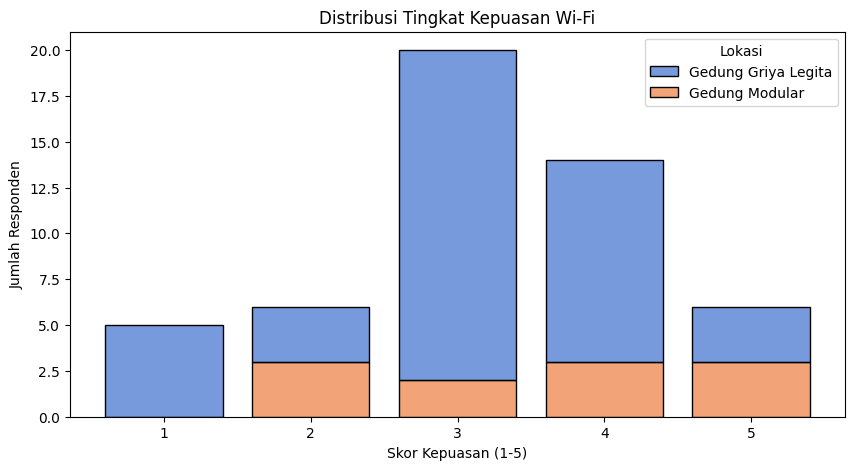

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# 1. LOAD DATA & PERSIAPAN
# ==========================================================
# Pastikan file excel berada di folder yang sama
try:
    df = pd.read_excel("data_survei.xlsx")
except:
    # Jika kamu menggunakan CSV hasil download dari Google Form
    df = pd.read_csv("data_survei.xlsx - Form Responses 1.csv")

# Rename kolom agar seragam
df.columns = ["Timestamp", "Lokasi", "Frekuensi", "Kepuasan", "Gangguan", "Perbandingan", "Komentar"]

# Filter data per lokasi
griya = df[df['Lokasi'] == 'Gedung Griya Legita']['Kepuasan'].dropna()
modular = df[df['Lokasi'] == 'Gedung Modular']['Kepuasan'].dropna()
df_filtered = df[df["Lokasi"].isin(["Gedung Griya Legita", "Gedung Modular"])]

print("="*50)
print("HASIL ANALISIS STATISTIK KELOMPOK 4")
print("="*50)

# ==========================================================
# 2. UJI NORMALITAS (SHAPIRO-WILK)
# ==========================================================
print("\n[STEP 1: UJI NORMALITAS]")
w_g, p_g = stats.shapiro(griya)
w_m, p_m = stats.shapiro(modular)
print(f"Griya Legita: W = {w_g:.4f}, p-value = {p_g:.4f} ({'Normal' if p_g > 0.05 else 'Tidak Normal'})")
print(f"Modular     : W = {w_m:.4f}, p-value = {p_m:.4f} ({'Normal' if p_m > 0.05 else 'Tidak Normal'})")

# ==========================================================
# 3. UJI HOMOGENITAS (LEVENE'S TEST)
# ==========================================================
print("\n[STEP 2: UJI HOMOGENITAS]")
stat_lev, p_lev = stats.levene(griya, modular, center='median')
print(f"Statistik Levene (W): {stat_lev:.4f}")
print(f"p-value: {p_lev:.4f}")
print(f"Kesimpulan: {'Varians Homogen' if p_lev > 0.05 else 'Varians Tidak Homogen'}")

# ==========================================================
# 4. PERHITUNGAN MANUAL (UNTUK LAPORAN)
# ==========================================================
print("\n[STEP 3: ANGKA UNTUK RUMUS]")
n1, n2 = len(griya), len(modular)
x1_bar, x2_bar = griya.mean(), modular.mean()
s1_sq, s2_sq = griya.var(), modular.var()

# Rumus Varians Gabungan (Pooled Variance)
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)
# Rumus T-hitung manual
t_manual = (x1_bar - x2_bar) / np.sqrt(sp_sq * (1/n1 + 1/n2))

print(f"n1 (Griya) = {n1}, n2 (Modular) = {n2}")
print(f"Mean1 = {x1_bar:.4f}, Mean2 = {x2_bar:.4f}")
print(f"Varians1 = {s1_sq:.4f}, Varians2 = {s2_sq:.4f}")
print(f"--- Hasil Perhitungan ---")
print(f"Varians Gabungan (sp^2) = {sp_sq:.4f}")
print(f"T-Hitung Manual         = {t_manual:.4f}")

# ==========================================================
# 5. UJI HIPOTESIS (T-TEST SCIPY)
# ==========================================================
print("\n[STEP 4: UJI HIPOTESIS (T-TEST)]")
t_stat, p_val = stats.ttest_ind(griya, modular, equal_var=(p_lev > 0.05))
print(f"T-Statistik (SciPy): {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Kesimpulan: {'Terima H0 (Tidak ada perbedaan)' if p_val > 0.05 else 'Tolak H0 (Ada perbedaan)'}")

# ==========================================================
# 6. VISUALISASI
# ==========================================================
plt.figure(figsize=(10, 5))
sns.histplot(data=df_filtered, x="Kepuasan", hue="Lokasi", bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
             multiple="stack", shrink=0.8, palette="muted")
plt.title("Distribusi Tingkat Kepuasan Wi-Fi")
plt.xlabel("Skor Kepuasan (1-5)")
plt.ylabel("Jumlah Responden")
plt.xticks([1, 2, 3, 4, 5])
plt.savefig("grafik_wifi_kelompok4.png")
print("\n[GRAFIK BERHASIL DISIMPAN: grafik_wifi_kelompok4.png]")
plt.show()